In [1]:
import os
from datetime import datetime, timedelta, date
import pandas as pd
from matplotlib import pyplot as plt
from IPython import display, get_ipython
import numpy as np
import seaborn as sns
from scipy import spatial
import swisseph as swe
from itertools import combinations, permutations

# first set path to ephemeris files
swe.set_ephe_path('./ephe')
swe.set_sid_mode(mode=swe.SIDM_GALCENT_RGILBRAND)

In [2]:
swetest = "./swe_unix_src_2.10.03/src/swetest"
exportPath = './export/'
marketPath = './market/'
imgPath = './image/'


if not os.path.exists(exportPath):
    os.makedirs(exportPath)


In [3]:
center = 'geo'

# geo
planets = [
'Sun',
'Moon',
'Mercury',
'Venus',
'Mars',
'Jupiter',
'Saturn',
'Uranus',
'Neptune',
'Pluto',
    
# 'mean_Node',
# 'true_Node',
# 'mean_Apogee',
# 'osc_Apogee',
# 'intp_Apogee',
# 'intp_Perigee',
    
# 'Chiron',
# 'Pholus',
# 'Ceres',
# 'Pallas',
# 'Juno',
# 'Vesta'

# 'sirius',    
]

In [4]:

df1 = pd.read_csv(exportPath + '400y_aspects_df.csv',parse_dates = True,index_col=0)


Index(['0_aspect-Sun-Moon', '0_aspect-Sun-Mercury', '0_aspect-Sun-Venus',
       '0_aspect-Sun-Mars', '0_aspect-Sun-Jupiter', '0_aspect-Sun-Saturn',
       '0_aspect-Sun-Uranus', '0_aspect-Sun-Neptune', '0_aspect-Sun-Pluto',
       '0_aspect-Moon-Mercury',
       ...
       '108_aspect-Jupiter-Saturn', '108_aspect-Jupiter-Uranus',
       '108_aspect-Jupiter-Neptune', '108_aspect-Jupiter-Pluto',
       '108_aspect-Saturn-Uranus', '108_aspect-Saturn-Neptune',
       '108_aspect-Saturn-Pluto', '108_aspect-Uranus-Neptune',
       '108_aspect-Uranus-Pluto', '108_aspect-Neptune-Pluto'],
      dtype='object', length=585)


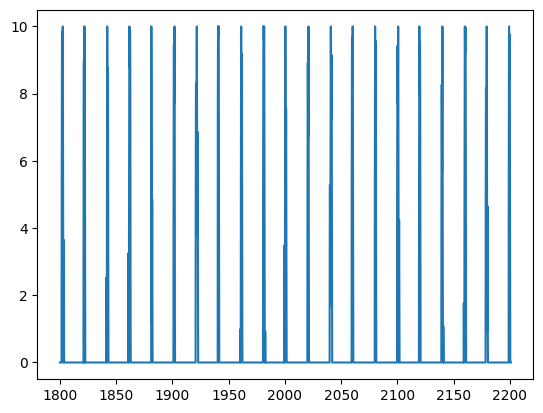

In [5]:
print(df1.columns)

plt.plot(df1['0_aspect-Jupiter-Saturn'])


In [6]:
ticker= (
    'BTCUSD'   
)



res = 'Day'
# res = 'Week'
# res = 'Month'
# res = 'Quarter'
# res = 'Year'


_df = pd.read_csv(marketPath + ticker + '.csv',parse_dates = True,index_col=0)
# _df = _df.tail(500)
if ticker == 'AMPL':
    _df = _df
else:
    _df = _df[:-1] # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    # _df = _df

if res == 'Day':
    _df = _df.resample('D').mean() 
elif res == 'Week':
    _df = _df.resample('W-MON').mean()    
elif res == 'Month':
    _df = _df.resample('MS').first()
elif res == 'Quarter':
    _df = _df.resample('Q').mean()    
elif res == 'Year':
    _df = _df.resample('Y').mean() 


if ticker == 'AMPL':
    # _df = _df.rename(columns={
    # "open": "open_price", 
    # "high": "high_price", 
    # "low": "low_price", 
    # "close": "close_price"})


    # _df['open']  = _df['Market Cap'] * _df['open_price'] 
    # _df['high']  = _df['Market Cap'] * _df['high_price'] 
    # _df['low']   = _df['Market Cap'] * _df['low_price']  
    # _df['close'] = _df['Market Cap'] * _df['close_price']

    _df['y'] = _df['Market Cap']
    # _df['y'] = _df['close_price']
    # _df['y'] = _df['close']
else:    #-----------------------------------------------------------------------------CHANGE ME------------------------------------------------------------------------------------------------------------------
    # _df['y'] = _df.iloc[:, 0]
    _df['y'] = _df['close']
    # _df['y'] = _df['fires']
    # _df['y'] = _df['acres']

# ##################################################
# # start_date = '2021-01-01' # 512
# # start_date = '2021-1-07'

# start_date =   _df.index.min().strftime('%Y-%m-%d')
# # end_date =   _df.index.max().strftime('%Y-%m-%d')
# end_date = '2021-01-01'


# after_start_date = _df.index >= start_date
# before_end_date = _df.index <= end_date
# between_two_dates = after_start_date & before_end_date
# _df = _df.loc[between_two_dates]
# ##################################################

earliest = _df.index.min()
latest = _df.index.max()

earliest = earliest.strftime('%Y-%m-%d')
latest = latest.strftime('%Y-%m-%d')
print(earliest, latest)


#######################################################################################################

# # start_date = "2020-01-01"
# # end_date = "2021-09-17"

# # cutoff_date = datetime.now() - timedelta(days=365*20+86)
# # cutoff_date = datetime.now() - timedelta(days=round((360*np.sqrt(360))+100))
# cutoff_date = datetime.now() - timedelta(days=round((4392)+100))
# cutoff_date_str = cutoff_date.strftime('%Y-%m-%d')
# print('cutoff_date_str',cutoff_date_str)


# Define the current date as a string
current_date_str = latest

# Convert the string to a date object
current_date = date.fromisoformat(current_date_str)

# Calculate the date 12 years ago
# start_date = date(current_date.year - 6, current_date.month, current_date.day)
start_date = date.fromisoformat('1970-01-01')

# Calculate the difference between the two dates
date_difference = current_date - start_date

# Get the total number of days
total_days = date_difference.days

# cutoff_date = start_date - timedelta(days=100)
# cutoff_date_str = cutoff_date.strftime('%Y-%m-%d')
cutoff_date_str = start_date.strftime('%Y-%m-%d')
print('cutoff_date_str',cutoff_date_str)


if res == 'Day':
    # if ticker == 'BTCUSD':
    #     start_date = "2003-01-01"
    # else:
    #     start_date = "2003-01-01"
    # start_date = "2000-01-01"
    start_date = cutoff_date_str
    end_date = latest
    # end_date = "2023-02-22"
else:
    start_date = earliest
    end_date = latest    

# start_date = earliest
# end_date = '2021-01-01'

# start_date = "2012-12-19"
# end_date = "2021-12-31"
#######################################################################################################

after_start_date = _df.index >= start_date
before_end_date = _df.index <= end_date
between_two_dates = after_start_date & before_end_date
_df = _df.loc[between_two_dates]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#######################################################################################################


earliest = _df.index.min()
latest = _df.index.max()

earliest = earliest.strftime('%Y-%m-%d')
latest = latest.strftime('%Y-%m-%d')
print(earliest, latest)






2009-10-05 2024-03-07
cutoff_date_str 1970-01-01
2009-10-05 2024-03-07


In [7]:
_df['shifted'] = _df['close'].shift(1)
_df = _df.assign(flag=_df['close'].gt(_df['close'].shift(1)))
_df = _df.fillna(0)
print(_df, len(_df)/8)

                    open          high           low         close  \
timestamp                                                            
2009-10-05      0.000764      0.000764      0.000764      0.000764   
2009-10-06      0.000885      0.000885      0.000885      0.000885   
2009-10-07      0.001050      0.001050      0.001050      0.001050   
2009-10-08      0.001084      0.001084      0.001084      0.001084   
2009-10-09      0.001200      0.001200      0.001200      0.001200   
...                  ...           ...           ...           ...   
2024-03-03  62020.100000  63253.000000  61385.000000  63148.920000   
2024-03-04  63146.760000  68465.500000  62288.500000  68285.060000   
2024-03-05  68288.080000  69156.650000  59173.920000  63792.770000   
2024-03-06  63798.340000  67653.840000  62833.750000  66103.550000   
2024-03-07  66102.850000  68042.770000  65621.410000  66885.680000   

                  volume             y       shifted   flag  
timestamp                  

In [8]:
after_start_date = df1.index >= earliest
before_end_date = df1.index <= latest
between_two_dates = after_start_date & before_end_date
df1 = df1.loc[between_two_dates]

In [9]:
import pandas as pd

planets = ['Moon', 'Sun', 'Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']

def create_valency_df(valency_values):
    valency_df = pd.DataFrame(valency_values, columns=planets, index=planets)
    return valency_df

valency_0 = create_valency_df([[0]*10]*10)
valency_180 = create_valency_df([[0]*10]*10)
valency_90 = create_valency_df([[0]*10]*10)
valency_120 = create_valency_df([[0]*10]*10)
valency_60 = create_valency_df([[0]*10]*10)
valency_30 = create_valency_df([[0]*10]*10)
valency_150 = create_valency_df([[0]*10]*10)
valency_72 = create_valency_df([[0]*10]*10)
valency_144 = create_valency_df([[0]*10]*10)
valency_45  = create_valency_df([[0]*10]*10)
valency_135 = create_valency_df([[0]*10]*10)
valency_36  = create_valency_df([[0]*10]*10)
valency_108 = create_valency_df([[0]*10]*10)

print(valency_0)


         Moon  Sun  Mercury  Venus  Mars  Jupiter  Saturn  Uranus  Neptune  \
Moon        0    0        0      0     0        0       0       0        0   
Sun         0    0        0      0     0        0       0       0        0   
Mercury     0    0        0      0     0        0       0       0        0   
Venus       0    0        0      0     0        0       0       0        0   
Mars        0    0        0      0     0        0       0       0        0   
Jupiter     0    0        0      0     0        0       0       0        0   
Saturn      0    0        0      0     0        0       0       0        0   
Uranus      0    0        0      0     0        0       0       0        0   
Neptune     0    0        0      0     0        0       0       0        0   
Pluto       0    0        0      0     0        0       0       0        0   

         Pluto  
Moon         0  
Sun          0  
Mercury      0  
Venus        0  
Mars         0  
Jupiter      0  
Saturn       0  
Uranu

In [10]:
df1 = df1.reset_index(drop=True)

aspect_0   = df1.filter(regex='^0_aspect').copy() 
aspect_180 = df1.filter(regex='^180_aspect').copy() 
aspect_90  = df1.filter(regex='^90_aspect').copy() 
aspect_120 = df1.filter(regex='^120_aspect').copy() 
aspect_60  = df1.filter(regex='^60_aspect').copy() 
aspect_30  = df1.filter(regex='^30_aspect').copy() 
aspect_150 = df1.filter(regex='^150_aspect').copy() 
aspect_72  = df1.filter(regex='^72_aspect').copy() 
aspect_144 = df1.filter(regex='^144_aspect').copy() 
aspect_45  = df1.filter(regex='^45_aspect').copy() 
aspect_135 = df1.filter(regex='^135_aspect').copy() 
aspect_36  = df1.filter(regex='^36_aspect').copy() 
aspect_108 = df1.filter(regex='^108_aspect').copy() 



In [11]:
def safe_division(n, d):
    return n / d if d else 0

def generate_valency(vdf, df):
    print('v_len', 'v_sum', 'v_diff', 'weightP', 'weightN', 'weightFinal')
    def cal_valency(col):
        
        def get_flag(i):
            # print(flags.loc[i])
            return flags.loc[i]
        
        c = df[col]
        y = _df.flag
        p = col.split("-")
        
        idx1 = c.index[c > 0].to_list()
        idx2 = c.index[c < 0].to_list()
        
        print(len(idx1), len(idx2))
        

        idx1 = list(map(lambda i: get_flag(i), idx1))
        idx2 = list(map(lambda i: get_flag(i), idx2))
        

        _valency = idx1 + idx2

        v_len = len(_valency)
        v_sum = sum(idx1)
        v_diff = sum(idx2)
        weightP = safe_division(v_sum, v_len)
        weightN = safe_division(v_diff, v_len) * -1
        weightFinal = weightP + weightN

        # print(p)

        print(v_len, v_sum, v_diff, weightP, weightN, weightFinal)


        # vdf.loc[p[1], p[2]] = weightFinal  # too smooth
            
        if v_diff > v_sum:
            vdf.loc[p[1], p[2]] = weightN
        if v_diff <= sum(_valency):
            vdf.loc[p[1], p[2]] = weightP
        
    list(map(lambda col: cal_valency(col), df))
    
    return vdf


In [12]:
flags = _df.flag.reset_index(drop=True).copy()

valency_0    = generate_valency(valency_0   , aspect_0   )   
valency_180  = generate_valency(valency_180 , aspect_180 )   
valency_90   = generate_valency(valency_90  , aspect_90  )   
valency_120  = generate_valency(valency_120 , aspect_120 )   
valency_60   = generate_valency(valency_60  , aspect_60  )   
valency_30   = generate_valency(valency_30  , aspect_30  )   
valency_150  = generate_valency(valency_150 , aspect_150 )   
valency_72   = generate_valency(valency_72  , aspect_72  )
valency_144  = generate_valency(valency_144 , aspect_144 )
valency_45   = generate_valency(valency_45  , aspect_45  )
valency_135  = generate_valency(valency_135 , aspect_135 )
valency_36   = generate_valency(valency_36  , aspect_36  )
valency_108  = generate_valency(valency_108 , aspect_108 )


v_len v_sum v_diff weightP weightN weightFinal
421 0
421 206 0 0.48931116389548696 -0.0 0.48931116389548696
2459 0
2459 1249 0 0.5079300528670191 -0.0 0.5079300528670191
1216 0
1216 604 0 0.4967105263157895 -0.0 0.4967105263157895
747 0
747 387 0 0.5180722891566265 -0.0 0.5180722891566265
496 0
496 237 0 0.4778225806451613 -0.0 0.4778225806451613
465 0
465 251 0 0.5397849462365591 -0.0 0.5397849462365591
391 0
391 183 0 0.4680306905370844 -0.0 0.4680306905370844
441 0
441 251 0 0.5691609977324263 -0.0 0.5691609977324263
461 0
461 234 0 0.5075921908893709 -0.0 0.5075921908893709
430 0
430 228 0 0.5302325581395348 -0.0 0.5302325581395348
428 0
428 239 0 0.5584112149532711 -0.0 0.5584112149532711
430 0
430 213 0 0.49534883720930234 -0.0 0.49534883720930234
441 0
441 219 0 0.4965986394557823 -0.0 0.4965986394557823
428 0
428 236 0 0.5514018691588785 -0.0 0.5514018691588785
394 0
394 197 0 0.5 -0.0 0.5
441 0
441 225 0 0.5102040816326531 -0.0 0.5102040816326531
422 0
422 222 0 0.526066350710

In [13]:
valency_0.to_csv(exportPath + 'valency_0.csv', sep=',')
valency_180.to_csv(exportPath + 'valency_180.csv', sep=',')
valency_90.to_csv(exportPath + 'valency_90.csv', sep=',')
valency_120.to_csv(exportPath + 'valency_120.csv', sep=',')
valency_60.to_csv(exportPath + 'valency_60.csv', sep=',')
valency_30.to_csv(exportPath + 'valency_30.csv', sep=',')
valency_150.to_csv(exportPath + 'valency_150.csv', sep=',')
valency_72.to_csv(exportPath + 'valency_72.csv', sep=',')
valency_144.to_csv(exportPath + 'valency_144.csv', sep=',')
valency_45.to_csv(exportPath + 'valency_45.csv', sep=',')
valency_135.to_csv(exportPath + 'valency_135.csv', sep=',')
valency_36.to_csv(exportPath + 'valency_36.csv', sep=',')
valency_108.to_csv(exportPath + 'valency_108.csv', sep=',')

In [14]:
print(valency_180)

             Moon  Sun   Mercury     Venus      Mars   Jupiter    Saturn  \
Moon     0.000000    0  0.497436  0.492823  0.469565  0.541872  0.394737   
Sun      0.527523    0  0.000000  0.000000  0.545455  0.565714  0.295082   
Mercury  0.000000    0  0.000000  0.000000  0.607595  0.562874  0.506667   
Venus    0.000000    0  0.000000  0.000000  0.512195  0.558621  0.470588   
Mars     0.000000    0  0.000000  0.000000  0.000000  0.503876  0.677419   
Jupiter  0.000000    0  0.000000  0.000000  0.000000  0.000000  0.351351   
Saturn   0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   
Uranus   0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   
Neptune  0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   
Pluto    0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   

           Uranus  Neptune  Pluto  
Moon     0.559633        0      0  
Sun      0.526066        0      0  
Mercury  0.517766        0      0  
Venus    0.503497  

In [16]:
swe.close()